In [46]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
all = pd.read_excel("../데이터자료/시차상관분석2Data.xlsx", index_col=0)  
all.drop(['Unnamed: 0'], axis = 1, inplace = True)
all.columns


Index(['DateTime', '종가_ex', '1Y_Mid_irs', '2Y_Mid_irs', '3Y_Mid_irs',
       '5Y_Mid_irs', '10Y_Mid_irs', '1Y_Mid_crs', '2Y_Mid_crs', '3Y_Mid_crs',
       '5Y_Mid_crs', '10Y_Mid_crs', '국고1년', '국고3년', '국고5년', '국고10년', '통안364일',
       '통안2년', 'Mid_ndf', '전일비_ndf', '1Y_베이시스', '2Y_베이시스', '3Y_베이시스',
       '5Y_베이시스', '10Y_베이시스', 'M1_스왑포인트', '전일대비_종가_ex', '등락률_종가_ex',
       '전일비_1Y_irs', '전일비_2Y_irs', '전일비_3Y_irs', '전일비_5Y_irs', '전일비_10Y_irs',
       '전일비_1Y_crs', '전일비_2Y_crs', '전일비_3Y_crs', '전일비_5Y_crs', '전일비_10Y_crs',
       '국고1년대비', '국고3년대비', '국고5년대비', '국고10년대비', '통안1년대비', '통안2년대비',
       '전일비_1Y_베이시스', '전일비_2Y_베이시스', '전일비_3Y_베이시스', '전일비_5Y_베이시스',
       '전일비_10Y_베이시스', '전날 종가_ex', '종가_NDF차이'],
      dtype='object')

In [47]:
# 컬럼 추출
all2 = all[['DateTime', '종가_ex','1Y_Mid_irs', '2Y_Mid_irs', '3Y_Mid_irs',
        '5Y_Mid_irs', '10Y_Mid_irs',  '1Y_Mid_crs', '2Y_Mid_crs','3Y_Mid_crs','5Y_Mid_crs','10Y_Mid_crs',
        '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf',
        'M1_스왑포인트']]            # [[]] 대괄호 2개 사용 -> 데이터 프레임형태로 나옴

all2 = all2.set_index("DateTime")

all2['1Y_대비_irs'] = all2['1Y_Mid_irs']-all2['1Y_Mid_irs'].shift(1)
all2['2Y_대비_irs'] = all2['2Y_Mid_irs']-all2['2Y_Mid_irs'].shift(1)
all2['3Y_대비_irs'] = all2['3Y_Mid_irs']-all2['3Y_Mid_irs'].shift(1)
all2['5Y_대비_irs'] = all2['5Y_Mid_irs']-all2['5Y_Mid_irs'].shift(1)
all2['10Y_대비_irs'] = all2['10Y_Mid_irs']-all2['10Y_Mid_irs'].shift(1)
all2['1Y_대비_crs'] = all2['1Y_Mid_crs']-all2['1Y_Mid_crs'].shift(1)
all2['2Y_대비_crs'] = all2['2Y_Mid_crs']-all2['2Y_Mid_crs'].shift(1)
all2['3Y_대비_crs'] = all2['3Y_Mid_crs']-all2['3Y_Mid_crs'].shift(1)
all2['5Y_대비_crs'] = all2['5Y_Mid_crs']-all2['5Y_Mid_crs'].shift(1)
all2['10Y_대비_crs'] = all2['10Y_Mid_crs']-all2['10Y_Mid_crs'].shift(1)

all2['대비_국고1년'] = all2['국고1년']-all2['국고1년'].shift(1)
all2['대비_국고3년'] = all2['국고3년']-all2['국고3년'].shift(1)
all2['대비_국고5년'] = all2['국고5년']-all2['국고5년'].shift(1)
all2['대비_국고10년'] = all2['국고10년']-all2['국고10년'].shift(1)
all2['대비_통안1년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_통안2년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_ndf'] = all2['Mid_ndf']-all2['Mid_ndf'].shift(1)
all2['스왑포인트_1월물'] = all2["M1_스왑포인트"]/100
all2['전일종가_ex'] = all2['종가_ex'].shift(1)

all2 = all2.dropna()

df = all2.copy()
df = all2[["종가_ex", 
            '1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
            '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
            "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
            "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]] # , "전일종가_ex"
df

,종가_ex,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,,
2012-08-03,1134.8,-0.03,-0.03,-0.03,-0.03,-0.02,-0.01,-0.015,-0.02,-0.08,-0.15,-0.02,-0.02,-0.07,-0.07,-0.02,-0.02,4.00,0.0240,1131.7
2012-08-06,1129.0,0.02,0.02,0.02,0.02,0.01,0.00,-0.025,-0.03,-0.04,-0.04,0.01,0.01,0.00,0.00,0.01,0.01,-9.50,0.0240,1134.8
2012-08-07,1128.8,0.01,0.00,0.00,0.01,0.02,0.02,0.015,0.00,-0.07,-0.08,-0.01,0.00,0.00,0.00,-0.01,-0.01,0.50,0.0250,1129.0
2012-08-08,1128.3,0.01,0.02,0.02,0.02,0.03,0.01,0.000,0.00,-0.02,-0.04,-0.01,-0.02,-0.02,-0.02,-0.01,-0.01,1.25,0.0240,1128.8
2012-08-09,1125.5,0.05,0.06,0.06,0.05,0.04,0.09,0.040,0.04,0.04,0.04,0.05,0.06,0.05,0.05,0.04,0.04,2.25,0.0235,1128.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,1313.7,-0.04,-0.08,-0.07,-0.09,-0.11,-0.08,-0.090,-0.07,-0.11,-0.11,-0.02,-0.06,-0.07,-0.09,-0.01,-0.01,3.35,-0.0060,1313.0
2022-07-26,1307.6,-0.01,-0.02,-0.03,-0.03,-0.03,0.01,-0.030,-0.03,-0.02,-0.02,0.01,-0.03,-0.02,-0.03,0.01,0.01,1.15,-0.0070,1313.7
2022-07-27,1313.3,-0.01,-0.05,-0.06,-0.06,-0.06,0.01,-0.010,-0.01,-0.01,-0.01,0.00,-0.03,-0.05,-0.06,0.02,0.02,-0.50,-0.0055,1307.6


<AxesSubplot:>

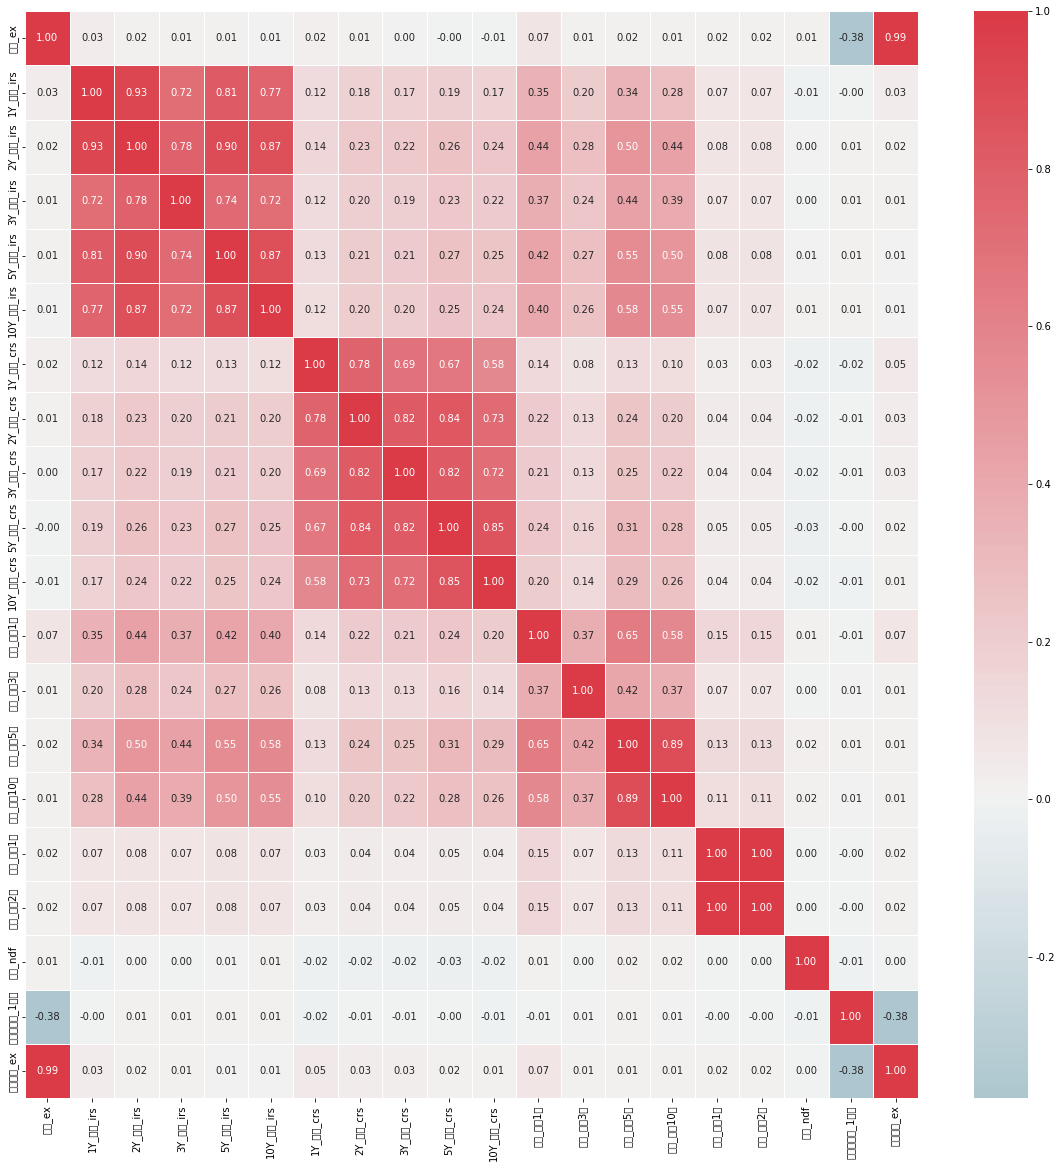

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [49]:
from sklearn.preprocessing import StandardScaler

x = all2[['1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
            '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
            "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
            "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]] 
y = df[["종가_ex"]]
x.feature = x.columns 

# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)
x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정
x_scaled

,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,
2012-08-03,-0.848159,-0.732099,-0.562745,-0.628439,-0.403644,-0.205698,-0.364180,-0.462791,-1.872418,-3.115253,-1.133777,-0.324094,-1.890723,-1.798842,-0.217667,-0.217667,0.103058,1.820638,-0.056282
2012-08-06,0.559997,0.481892,0.370922,0.415773,0.202253,-0.003456,-0.602348,-0.690892,-0.939341,-0.833148,0.563092,0.159979,0.000440,-0.000209,0.107313,0.107313,-0.250580,1.820638,-0.000487
2012-08-07,0.278366,-0.003704,-0.002545,0.206931,0.404219,0.401029,0.350324,-0.006589,-1.639149,-1.663004,-0.568154,-0.001379,0.000440,-0.000209,-0.109340,-0.109340,0.011374,1.911215,-0.104877
2012-08-08,0.278366,0.481892,0.370922,0.415773,0.606184,0.198787,-0.006928,-0.006589,-0.472802,-0.833148,-0.568154,-0.324094,-0.539892,-0.514104,-0.109340,-0.109340,0.031020,1.820638,-0.108476
2012-08-09,1.404890,1.453085,1.117855,1.042301,0.808150,1.816727,0.945744,0.905815,0.926814,0.826565,2.825583,0.966767,1.351270,1.284529,0.432293,0.432293,0.057216,1.775350,-0.117475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129790,-1.946090,-1.309678,-1.881494,-2.221333,-1.621396,-2.150439,-1.603295,-2.572226,-2.285397,-1.133777,-0.969524,-1.890723,-2.312737,-0.109340,-0.109340,0.086031,-0.896666,3.206786
2022-07-26,-0.284897,-0.489301,-0.562745,-0.628439,-0.605609,0.198787,-0.721432,-0.690892,-0.472802,-0.418220,0.563092,-0.485451,-0.539892,-0.771052,0.107313,0.107313,0.028401,-0.987243,3.219385
2022-07-27,-0.284897,-1.217695,-1.122944,-1.254966,-1.211506,0.198787,-0.245096,-0.234690,-0.239533,-0.210756,-0.002531,-0.485451,-1.350390,-1.541894,0.215640,0.215640,-0.014822,-0.851378,3.109596


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     9.971044   1Y_대비_irs
1    19.492977   2Y_대비_irs
2     2.661252   3Y_대비_irs
3     6.466425   5Y_대비_irs
4     5.867648  10Y_대비_irs
5     2.653802   1Y_대비_crs
6     5.264113   2Y_대비_crs
7     3.829583   3Y_대비_crs
8     6.699750   5Y_대비_crs
9     3.715463  10Y_대비_crs
10    1.895439     대비_국고1년
11    1.252833     대비_국고3년
12    6.215430     대비_국고5년
13    5.051630    대비_국고10년
14         inf     대비_통안1년
15         inf     대비_통안2년
16    1.003039      대비_ndf
17    1.169516   스왑포인트_1월물
18    1.181901     전일종가_ex


In [51]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.414e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:05   Log-Likelihood:                -7643.4
No. Observations:                2458   AIC:                         1.532e+04
Df Residuals:                    2439   BIC:                         1.544e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.03e+04      0.000    1134.680    1135.111
1Y_대비_irs      0.1376      0.347      0.397      0.692      -0.542       0.818
2Y_대비_irs      0.6007      0.485      1.239      0.215      -0.350       1.551
3Y_대비_irs      0.0062      0.179      0.035      0.972      -0.345       0.357
5Y_대비_irs     -0.2771      0.279     -0.992      0.321      -0.825       0.270
10Y_대비_irs    -0.5490      0.266     -2.064      0.039      -1.071      -0.027
1Y_대비_crs     -1.0822      0.179     -6.050      0.000      -1.433      -0.731
2Y_대비_crs     -0.2674      0.252     -1.061      0.289      -0.761       0.227
3Y_대비_crs     -0.4387      0.215     -2.041      0.041      -0.860      -0.017
5Y_대비_crs     -0.1748      0.284     -0.615      0.539      -0.732       0.383
10Y_대비_crs     0.1950      0.212      0.921      0.357      -0.220       0.610
대비_국고1년        0.1108      0.151      0.733      0.464      -0.186       0.407
대비_국고3년       -0.2692      0.123     -2.190      0.029      -0.510      -0.028
대비_국고5년        1.0439      0.274      3.813      0.000       0.507       1.581
대비_국고10년      -0.2588      0.247     -1.049      0.294      -0.743       0.225
대비_통안1년       -0.0007      0.056     -0.013      0.989      -0.110       0.108
대비_통안2년       -0.0007      0.056     -0.013      0.989      -0.110       0.108
대비_ndf         0.3929      0.110      3.572      0.000       0.177       0.609
스왑포인트_1월물     -0.1426      0.119     -1.201      0.230      -0.375       0.090
전일종가_ex       55.3636      0.119    463.769      0.000      55.130      55.598
==============================================================================
Omnibus:                       32.965   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.350
Skew:                          -0.019   Prob(JB):                     2.14e-13
Kurtosis:                       3.754   Cond. No.                     1.86e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.48e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
x_scaled.drop(['2Y_대비_irs'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.929362   1Y_대비_irs
1     2.550720   3Y_대비_irs
2     5.800935   5Y_대비_irs
3     5.216470  10Y_대비_irs
4     2.650834   1Y_대비_crs
5     5.252994   2Y_대비_crs
6     3.827048   3Y_대비_crs
7     6.694152   5Y_대비_crs
8     3.715299  10Y_대비_crs
9     1.883725     대비_국고1년
10    1.246721     대비_국고3년
11    6.124971     대비_국고5년
12    5.037588    대비_국고10년
13         inf     대비_통안1년
14         inf     대비_통안2년
15    1.002513      대비_ndf
16    1.169451   스왑포인트_1월물
17    1.181135     전일종가_ex


In [53]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.497e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:08   Log-Likelihood:                -7644.1
No. Observations:                2458   AIC:                         1.532e+04
Df Residuals:                    2440   BIC:                         1.543e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.03e+04      0.000    1134.680    1135.111
1Y_대비_irs      0.4720      0.218      2.168      0.030       0.045       0.899
3Y_대비_irs      0.0515      0.175      0.293      0.769      -0.292       0.395
5Y_대비_irs     -0.1661      0.265     -0.628      0.530      -0.685       0.353
10Y_대비_irs    -0.4393      0.251     -1.751      0.080      -0.931       0.053
1Y_대비_crs     -1.0896      0.179     -6.094      0.000      -1.440      -0.739
2Y_대비_crs     -0.2531      0.252     -1.005      0.315      -0.747       0.240
3Y_대비_crs     -0.4455      0.215     -2.074      0.038      -0.867      -0.024
5Y_대비_crs     -0.1646      0.284     -0.579      0.562      -0.722       0.393
10Y_대비_crs     0.1968      0.212      0.930      0.353      -0.218       0.612
대비_국고1년        0.1255      0.151      0.833      0.405      -0.170       0.421
대비_국고3년       -0.2585      0.123     -2.108      0.035      -0.499      -0.018
대비_국고5년        1.0848      0.272      3.991      0.000       0.552       1.618
대비_국고10년      -0.2750      0.246     -1.115      0.265      -0.758       0.208
대비_통안1년       -0.0020      0.056     -0.036      0.971      -0.111       0.107
대비_통안2년       -0.0020      0.056     -0.036      0.971      -0.111       0.107
대비_ndf         0.3960      0.110      3.601      0.000       0.180       0.612
스왑포인트_1월물     -0.1415      0.119     -1.191      0.234      -0.374       0.091
전일종가_ex       55.3599      0.119    463.837      0.000      55.126      55.594
==============================================================================
Omnibus:                       32.458   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.206
Skew:                          -0.016   Prob(JB):                     3.78e-13
Kurtosis:                       3.747   Cond. No.                     6.78e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
x_scaled.drop(['대비_통안2년', '대비_통안1년'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()
# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.591e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:10   Log-Likelihood:                -7644.1
No. Observations:                2458   AIC:                         1.532e+04
Df Residuals:                    2441   BIC:                         1.542e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.03e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4719      0.218      2.168      0.030       0.045       0.899
3Y_대비_irs      0.0515      0.175      0.294      0.769      -0.292       0.395
5Y_대비_irs     -0.1661      0.264     -0.628      0.530      -0.685       0.352
10Y_대비_irs    -0.4392      0.251     -1.751      0.080      -0.931       0.053
1Y_대비_crs     -1.0896      0.179     -6.095      0.000      -1.440      -0.739
2Y_대비_crs     -0.2531      0.252     -1.006      0.315      -0.747       0.240
3Y_대비_crs     -0.4455      0.215     -2.074      0.038      -0.867      -0.024
5Y_대비_crs     -0.1646      0.284     -0.579      0.562      -0.722       0.392
10Y_대비_crs     0.1968      0.212      0.930      0.353      -0.218       0.612
대비_국고1년        0.1251      0.150      0.833      0.405      -0.170       0.420
대비_국고3년       -0.2586      0.123     -2.109      0.035      -0.499      -0.018
대비_국고5년        1.0846      0.272      3.992      0.000       0.552       1.617
대비_국고10년      -0.2750      0.246     -1.116      0.265      -0.758       0.208
대비_ndf         0.3960      0.110      3.602      0.000       0.180       0.612
스왑포인트_1월물     -0.1415      0.119     -1.192      0.233      -0.374       0.091
전일종가_ex       55.3598      0.119    463.948      0.000      55.126      55.594
==============================================================================
Omnibus:                       32.449   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.183
Skew:                          -0.016   Prob(JB):                     3.83e-13
Kurtosis:                       3.747   Cond. No.                         7.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
x_scaled.drop(['3Y_대비_irs', '5Y_대비_crs'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')
# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()
# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.819e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:11   Log-Likelihood:                -7644.3
No. Observations:                2458   AIC:                         1.532e+04
Df Residuals:                    2443   BIC:                         1.541e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.03e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4956      0.209      2.377      0.018       0.087       0.904
5Y_대비_irs     -0.1598      0.261     -0.611      0.541      -0.672       0.353
10Y_대비_irs    -0.4319      0.248     -1.743      0.081      -0.918       0.054
1Y_대비_crs     -1.0899      0.179     -6.101      0.000      -1.440      -0.740
2Y_대비_crs     -0.3042      0.234     -1.298      0.195      -0.764       0.156
3Y_대비_crs     -0.4850      0.204     -2.378      0.017      -0.885      -0.085
10Y_대비_crs     0.1263      0.171      0.738      0.461      -0.209       0.462
대비_국고1년        0.1269      0.150      0.846      0.398      -0.167       0.421
대비_국고3년       -0.2589      0.123     -2.113      0.035      -0.499      -0.019
대비_국고5년        1.0806      0.271      3.983      0.000       0.549       1.613
대비_국고10년      -0.2738      0.246     -1.111      0.267      -0.757       0.209
대비_ndf         0.3976      0.110      3.619      0.000       0.182       0.613
스왑포인트_1월물     -0.1416      0.119     -1.193      0.233      -0.374       0.091
전일종가_ex       55.3601      0.119    464.158      0.000      55.126      55.594
==============================================================================
Omnibus:                       32.309   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.863
Skew:                          -0.015   Prob(JB):                     4.49e-13
Kurtosis:                       3.745   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
x_scaled.drop(['5Y_대비_irs', '10Y_대비_crs'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')
# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()
# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.124e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:12   Log-Likelihood:                -7644.8
No. Observations:                2458   AIC:                         1.532e+04
Df Residuals:                    2445   BIC:                         1.539e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.03e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4296      0.184      2.339      0.019       0.069       0.790
10Y_대비_irs    -0.5033      0.209     -2.412      0.016      -0.913      -0.094
1Y_대비_crs     -1.0855      0.178     -6.081      0.000      -1.435      -0.735
2Y_대비_crs     -0.2560      0.224     -1.143      0.253      -0.695       0.183
3Y_대비_crs     -0.4425      0.194     -2.276      0.023      -0.824      -0.061
대비_국고1년        0.1206      0.150      0.805      0.421      -0.173       0.414
대비_국고3년       -0.2607      0.122     -2.130      0.033      -0.501      -0.021
대비_국고5년        1.0754      0.270      3.987      0.000       0.547       1.604
대비_국고10년      -0.2735      0.246     -1.111      0.267      -0.756       0.209
대비_ndf         0.3966      0.110      3.611      0.000       0.181       0.612
스왑포인트_1월물     -0.1433      0.119     -1.207      0.227      -0.376       0.089
전일종가_ex       55.3596      0.119    464.423      0.000      55.126      55.593
==============================================================================
Omnibus:                       32.795   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.013
Skew:                          -0.016   Prob(JB):                     2.53e-13
Kurtosis:                       3.752   Cond. No.                         6.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
x_scaled.drop(['대비_국고1년', '2Y_대비_crs'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')
# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()
# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.548e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:13   Log-Likelihood:                -7645.7
No. Observations:                2458   AIC:                         1.531e+04
Df Residuals:                    2447   BIC:                         1.538e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.03e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4564      0.180      2.537      0.011       0.104       0.809
10Y_대비_irs    -0.5272      0.207     -2.547      0.011      -0.933      -0.121
1Y_대비_crs     -1.1878      0.153     -7.778      0.000      -1.487      -0.888
3Y_대비_crs     -0.5723      0.156     -3.657      0.000      -0.879      -0.265
대비_국고3년       -0.2498      0.121     -2.058      0.040      -0.488      -0.012
대비_국고5년        1.1273      0.256      4.410      0.000       0.626       1.629
대비_국고10년      -0.2623      0.246     -1.066      0.287      -0.745       0.220
대비_ndf         0.3980      0.110      3.624      0.000       0.183       0.613
스왑포인트_1월물     -0.1423      0.119     -1.200      0.230      -0.375       0.090
전일종가_ex       55.3668      0.119    465.807      0.000      55.134      55.600
==============================================================================
Omnibus:                       32.804   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.038
Skew:                          -0.016   Prob(JB):                     2.50e-13
Kurtosis:                       3.752   Cond. No.                         5.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
x_scaled.drop(['대비_국고10년', '스왑포인트_1월물'], axis=1, inplace=True) # '3Y_대비_crs'

feature_add = sm.add_constant(x_scaled, has_constant='add')
# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()
# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.185e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:13   Log-Likelihood:                -7647.0
No. Observations:                2458   AIC:                         1.531e+04
Df Residuals:                    2449   BIC:                         1.536e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.03e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4876      0.177      2.749      0.006       0.140       0.835
10Y_대비_irs    -0.5678      0.204     -2.790      0.005      -0.967      -0.169
1Y_대비_crs     -1.1848      0.153     -7.759      0.000      -1.484      -0.885
3Y_대비_crs     -0.5736      0.156     -3.666      0.000      -0.881      -0.267
대비_국고3년       -0.2492      0.121     -2.053      0.040      -0.487      -0.011
대비_국고5년        0.9041      0.149      6.076      0.000       0.612       1.196
대비_ndf         0.4005      0.110      3.647      0.000       0.185       0.616
전일종가_ex       55.4194      0.110    503.814      0.000      55.204      55.635
==============================================================================
Omnibus:                       33.336   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.203
Skew:                          -0.021   Prob(JB):                     1.39e-13
Kurtosis:                       3.759   Cond. No.                         3.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=10)
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))


MSE : 28.93121607394522, RMSE :  5.379, MAE: 5.379
Variance score :  0.990


In [60]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(mlr, x_scaled, y,scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 *neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse,rmse_scores, neg_mse_scores

(5.5315582860757155,
 array([4.16800723, 7.05187779, 5.75369356, 5.52054714, 5.16366571]),
 array([-17.3722843 , -49.72898031, -33.10498958, -30.47644072,
        -26.66344357]))